In [1]:
import math
import numpy as np
import random
import csv
import matplotlib.pyplot as plt
import pandas as pd
import json 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.signal import find_peaks

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from BaselineRemoval import BaselineRemoval
from sklearn.metrics import mean_squared_error

from scipy import signal
from sklearn.tree import DecisionTreeRegressor 

from scipy.signal import argrelextrema
from sklearn.preprocessing import PolynomialFeatures
from scipy import interpolate
import bisect

In [2]:
SEE1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test47 SEE1.csv.csv")
SEE2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test48 SEE2.csv.csv")
SEE3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test49 SEE3.csv.csv")
SEE4 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test50 SEE4.csv.csv")
SEE5 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test51 SEE5.csv.csv")

In [3]:
#Loading the corresponding force data
force_SEE1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#47 SEE1.log" , delimiter = "\t")
force_SEE2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#48 SEE2.log" , delimiter = "\t")
force_SEE3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#49 SEE3.log" , delimiter = "\t")
force_SEE4 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#50 SEE4.log" , delimiter = "\t")
force_SEE5 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#51 SEE5.log" , delimiter = "\t")

In [4]:
#Visulizing the force data - test #2 - 6 - NE1-5
plt.figure(figsize=(50, 30))

#Time for force
x_force_SEE1 = force_SEE1["Time"]
x_force_SEE2 = force_SEE2["Time"]
x_force_SEE3 = force_SEE3["Time"]
x_force_SEE4 = force_SEE4["Time"]
x_force_SEE5 = force_SEE5["Time"]

#force
Load_SEE1 = force_SEE1["Load"]
Load_SEE2 = force_SEE2["Load"]
Load_SEE3 = force_SEE3["Load"]
Load_SEE4 = force_SEE4["Load"]
Load_SEE5 = force_SEE5["Load"]

#plt.plot(x_force_SEE1,Load_SEE1,color = 'green', label = 'force data SEE1 test #47' )
#plt.plot(x_force_SEE2,Load_SEE2,color = 'blue', label = 'force data SEE2 test #48' )
# plt.plot(x_force_SEE3,Load_SEE3,color = 'yellow', label = 'force data SEE3 test #49' )
# plt.plot(x_force_SEE4,Load_SEE4,color = 'red', label = 'force data SEE4 test #50' )
# plt.plot(x_force_SEE5,Load_SEE5,color = 'brown', label = 'force data SEE5 test #51' )

<Figure size 3600x2160 with 0 Axes>

Sensor 4 is more profound for SEE1


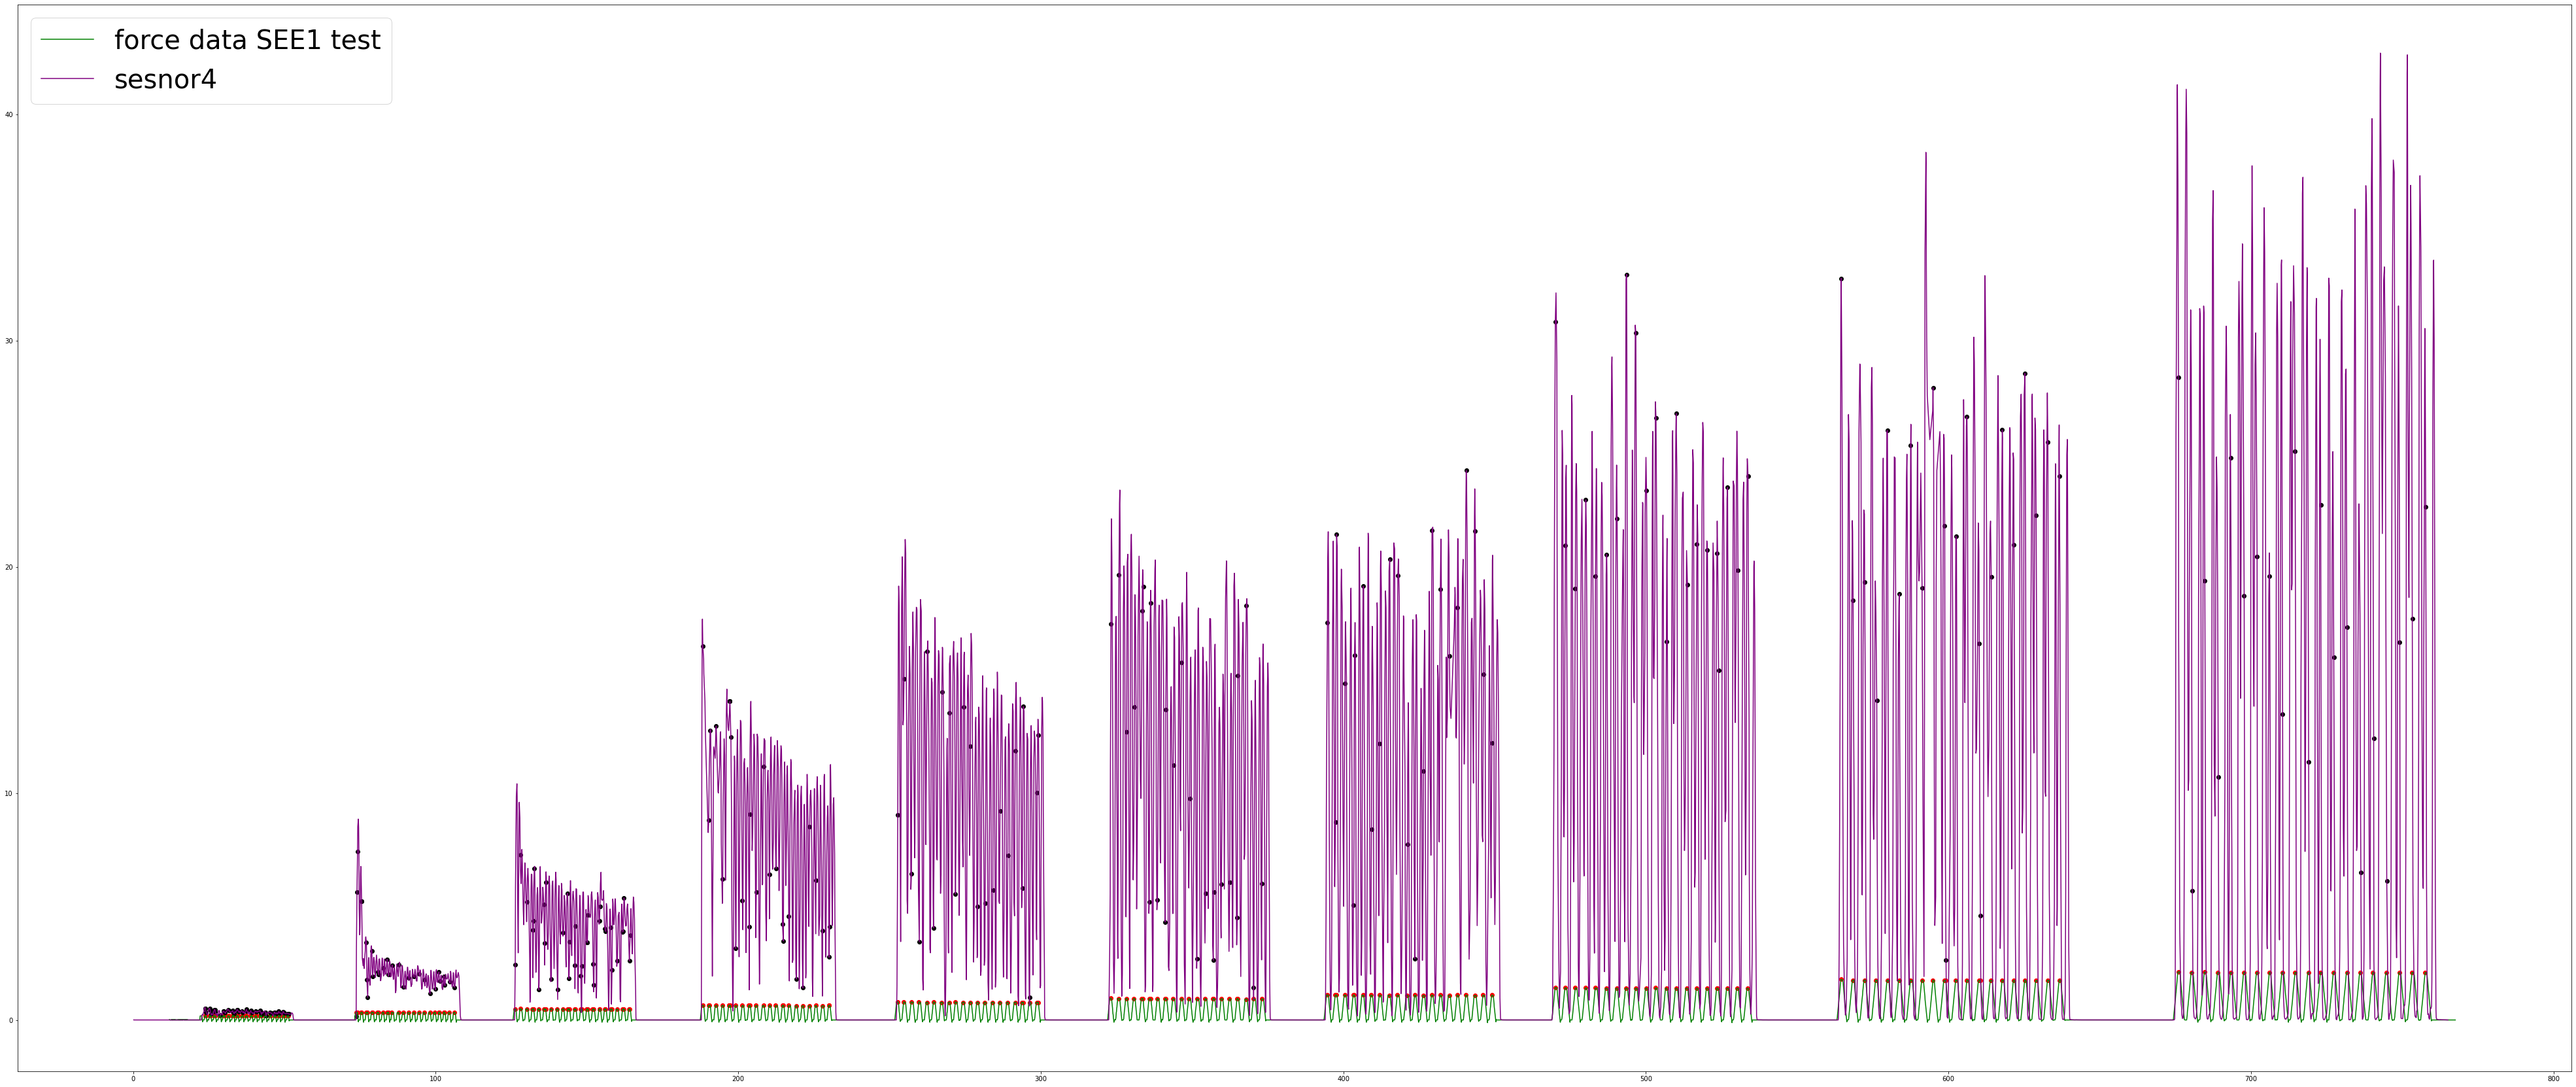

In [19]:
#visualizing and syncing the resistance data for each sensor S 1- 5 - SEE1

plt.figure(figsize=(70, 30))

# plt.plot(SEE1["Unnamed: 0"],SEE1["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(SEE1["Unnamed: 0"],SEE1["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SEE1["Unnamed: 0"],SEE1["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(SEE1["Unnamed: 0"],SEE1["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SEE1 = x_force_SEE1 + 12
scaled_SEE1 = SEE1["Unnamed: 0"]

plt.plot(scaled_x_force_SEE1,Load_SEE1,color = 'green', label = 'force data SEE1 test' )
plt.plot(scaled_SEE1,SEE1["s4_d"], color = 'purple', label = 'sesnor4')

plt.legend(fontsize=40)


print("Sensor 4 is more profound for SEE1")

#finding the peaks
pidx_Load_SEE1, _ = find_peaks(Load_SEE1,prominence= 0.22 )
peaks_Load_SEE1 = Load_SEE1[pidx_Load_SEE1]
peaks_Ltime_SEE1 = scaled_x_force_SEE1[pidx_Load_SEE1]

plt.scatter(peaks_Ltime_SEE1,peaks_Load_SEE1,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SEE1time = []
peaks_Ltime_SEE1.reset_index(drop = True, inplace = True)
peaks_Load_SEE1.reset_index(drop = True, inplace = True)
for i in range(len(peaks_Ltime_SEE1)):
    idx_SEE1time.append(bisect.bisect_left(SEE1["Unnamed: 0"], peaks_Ltime_SEE1[i]))

plt.scatter(SEE1["Unnamed: 0"][idx_SEE1time],SEE1["s4_d"][idx_SEE1time],color = 'black')

In [20]:
#Storing the data in csv files - SEE1
Load_SEE1peaks =[]
for i in range(len(peaks_Load_SEE1)):
    Load_SEE1peaks.append(peaks_Load_SEE1[i])
    
content_SEE1 = {'R1':SEE1["s1_d"][idx_SEE1time],
              'R2':SEE1["s2_d"][idx_SEE1time],
              'R3':SEE1["s3_d"][idx_SEE1time],
              'R4':SEE1["s4_d"][idx_SEE1time], 
              'Load': Load_SEE1peaks} 

# load_SE1 = {'Load': Load_SE1[pidx_Load_SE1]}

df_SEE1 = pd.DataFrame(content_SEE1, columns = ['R1','R2','R3','R4','Load'])

# load_SE1= pd.DataFrame(load_SE1, columns = ['Load'])
df_SEE1.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SEE1.csv',index = False, header = True)


Sensor 4 is more profound for SEE2


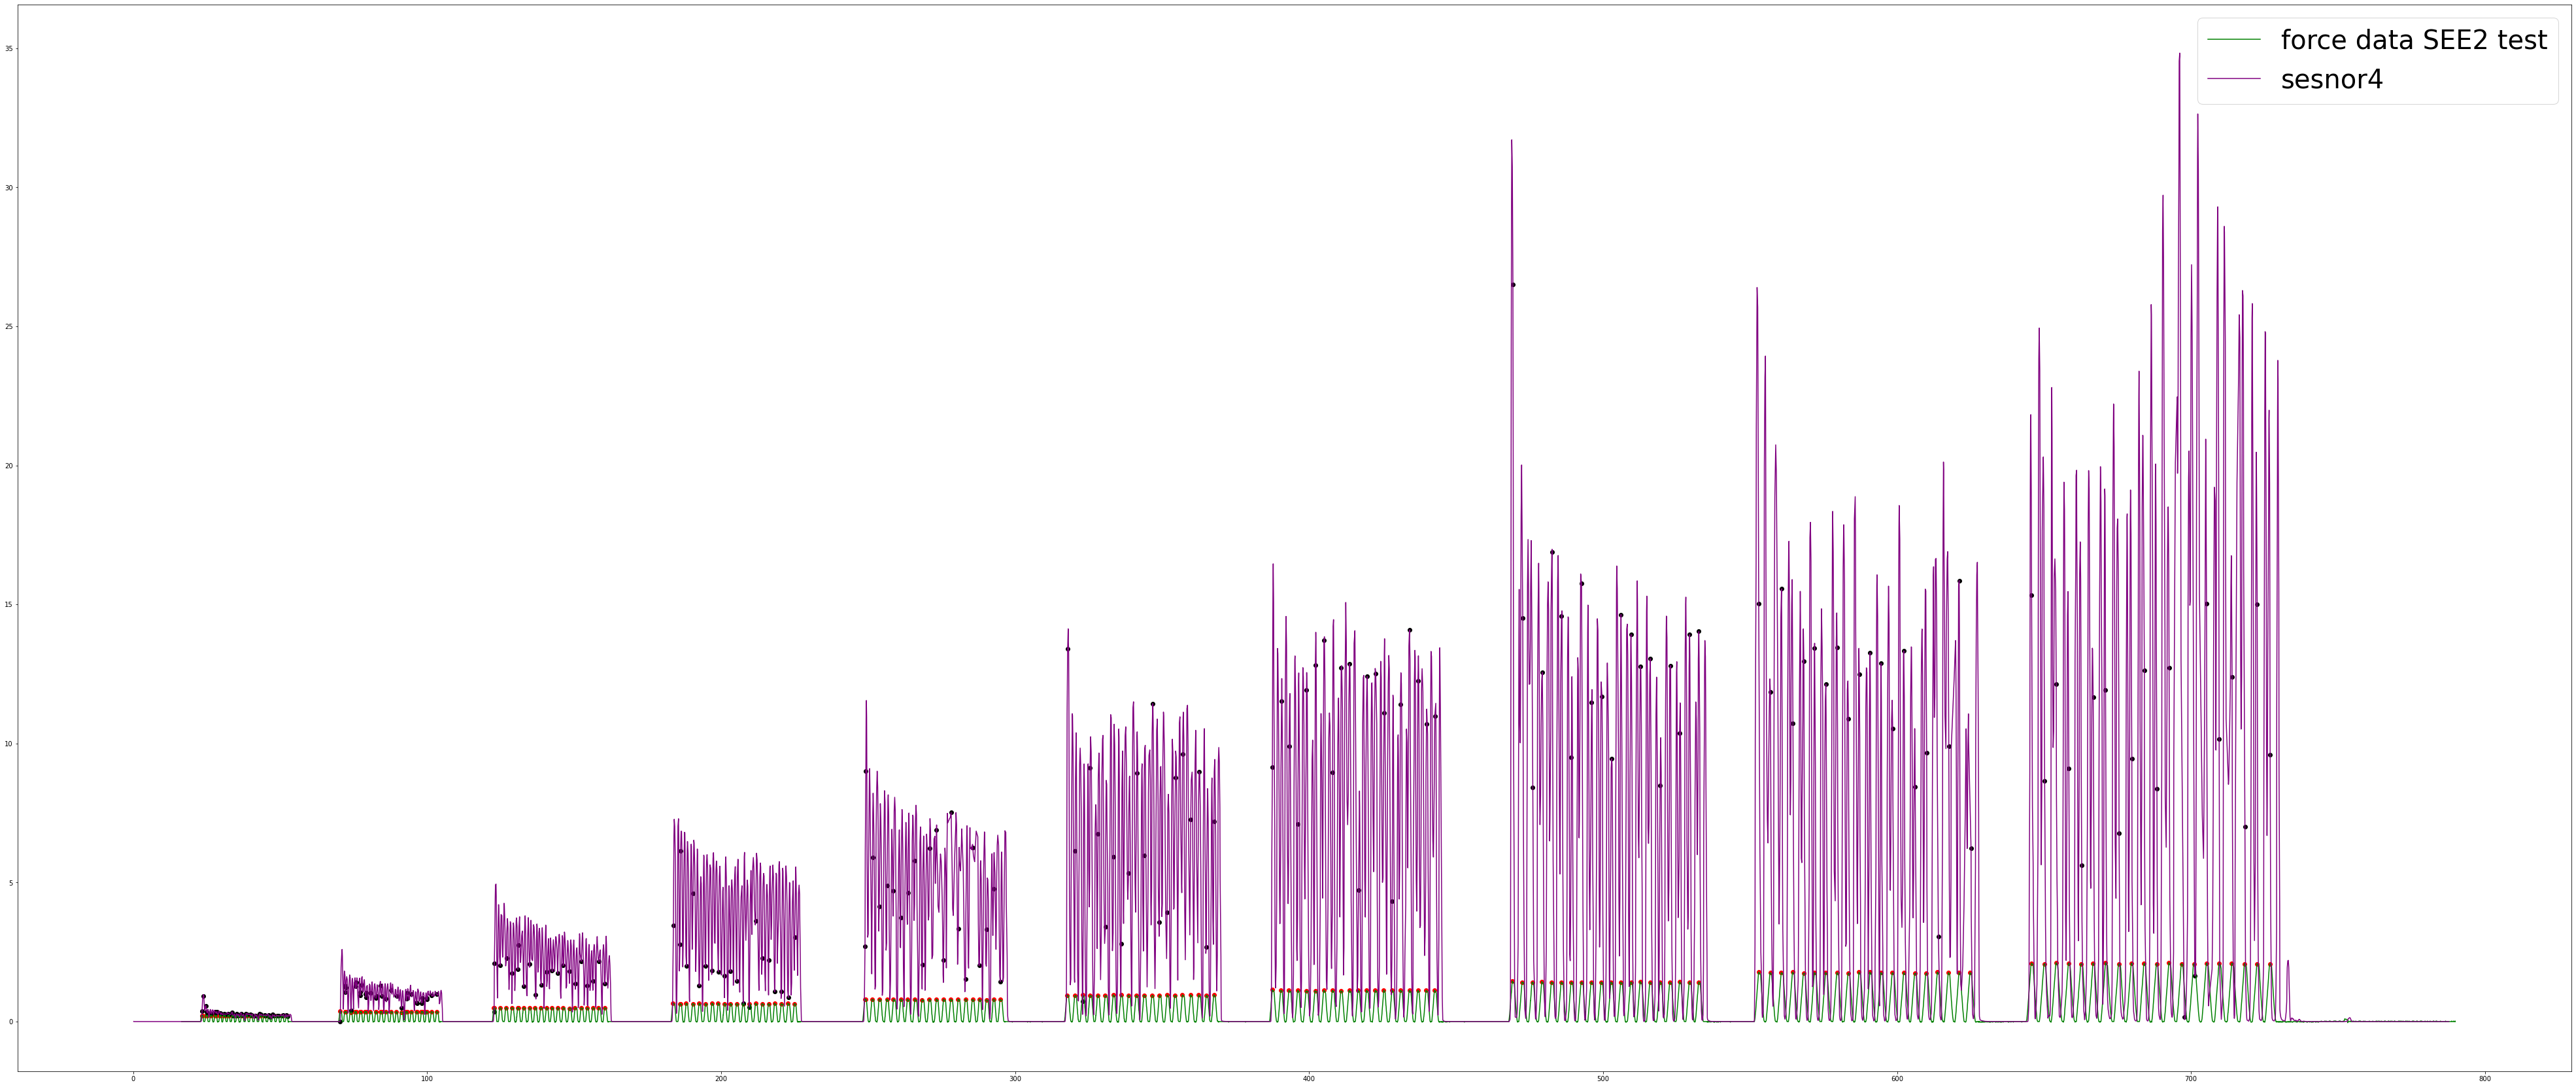

In [32]:
#visualizing and syncing the resistance data for each sensor S 1- 5 - SEE2

plt.figure(figsize=(70, 30))

# plt.plot(SEE2["Unnamed: 0"],SEE2["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(SEE2["Unnamed: 0"],SEE2["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SEE2["Unnamed: 0"],SEE2["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(SEE2["Unnamed: 0"],SEE2["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SEE2 = x_force_SEE2 + 16.5
scaled_SEE2 = SEE2["Unnamed: 0"]

plt.plot(scaled_x_force_SEE2,Load_SEE2,color = 'green', label = 'force data SEE2 test' )
plt.plot(scaled_SEE2,SEE2["s4_d"], color = 'purple', label = 'sesnor4')

plt.legend(fontsize=40)


print("Sensor 4 is more profound for SEE2")

#finding the peaks
pidx_Load_SEE2, _ = find_peaks(Load_SEE2,prominence= 0.22 )
peaks_Load_SEE2 = Load_SEE2[pidx_Load_SEE2]
peaks_Ltime_SEE2 = scaled_x_force_SEE2[pidx_Load_SEE2]

plt.scatter(peaks_Ltime_SEE2,peaks_Load_SEE2,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SEE2time = []
peaks_Ltime_SEE2.reset_index(drop = True, inplace = True)
peaks_Load_SEE2.reset_index(drop = True, inplace = True)
for i in range(len(peaks_Ltime_SEE2)):
    idx_SEE2time.append(bisect.bisect_left(SEE2["Unnamed: 0"], peaks_Ltime_SEE2[i]))

plt.scatter(SEE2["Unnamed: 0"][idx_SEE2time],SEE2["s4_d"][idx_SEE2time],color = 'black')

In [33]:
#Storing the data in csv files - SEE2
Load_SEE2peaks =[]
for i in range(len(peaks_Load_SEE2)):
    Load_SEE2peaks.append(peaks_Load_SEE2[i])
    
content_SEE2 = {'R1':SEE2["s1_d"][idx_SEE2time],
              'R2':SEE2["s2_d"][idx_SEE2time],
              'R3':SEE2["s3_d"][idx_SEE2time],
              'R4':SEE2["s4_d"][idx_SEE2time], 
              'Load': Load_SEE2peaks} 

# load_SE1 = {'Load': Load_SE1[pidx_Load_SE1]}

df_SEE2 = pd.DataFrame(content_SEE2, columns = ['R1','R2','R3','R4','Load'])

# load_SE1= pd.DataFrame(load_SE1, columns = ['Load'])
df_SEE2.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SEE2.csv',index = False, header = True)


Sensor 3 is more profound for SEE3


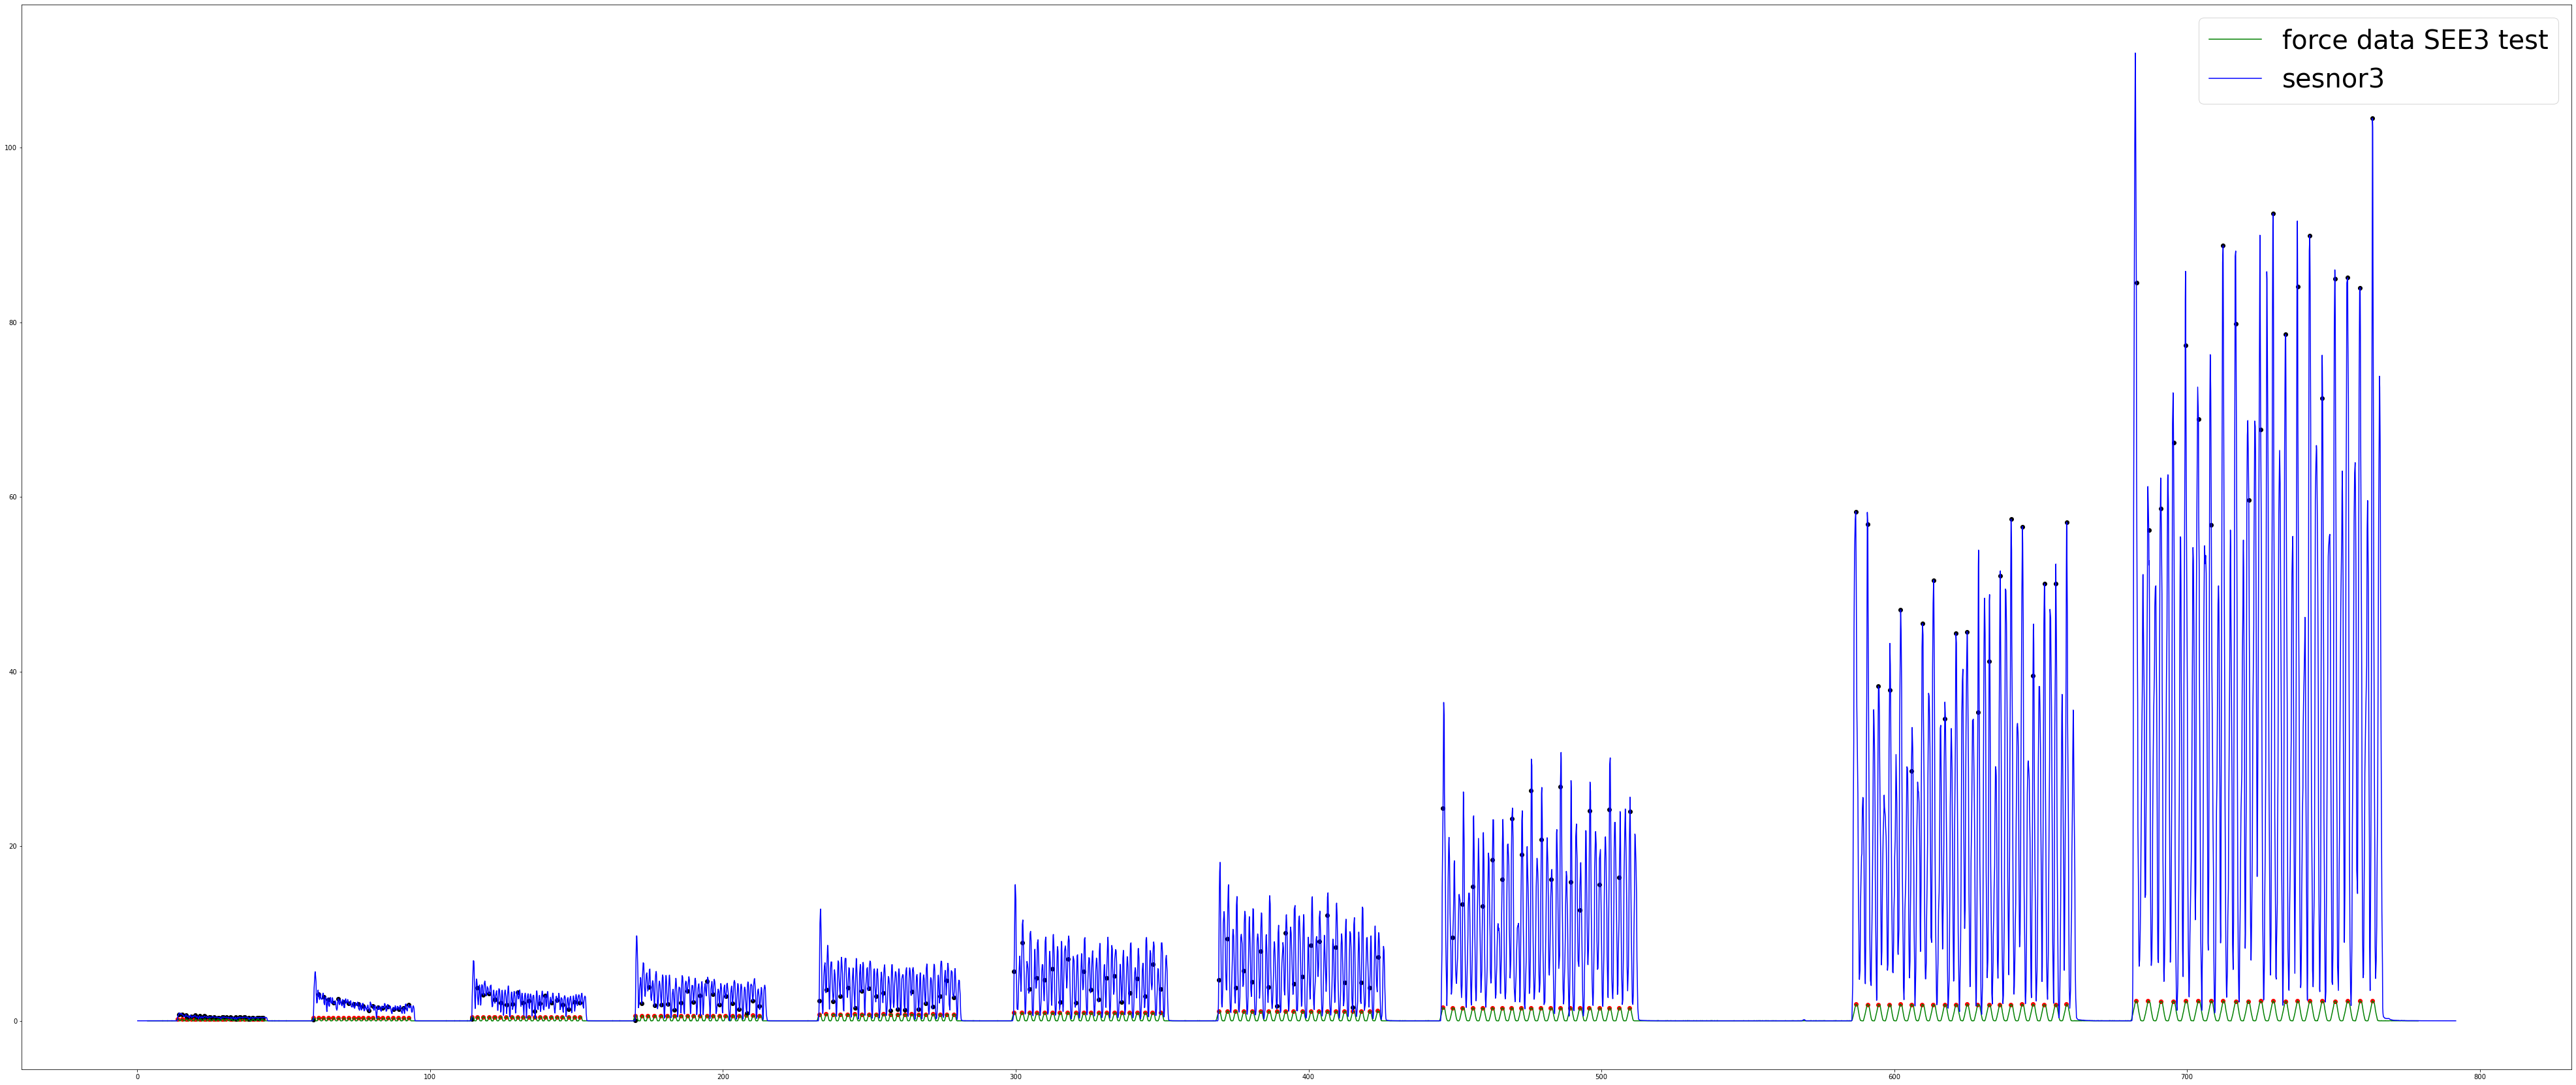

In [45]:
#visualizing and syncing the resistance data for each sensor S 1- 5 - SEE3

plt.figure(figsize=(70, 30))

# plt.plot(SEE3["Unnamed: 0"],SEE3["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(SEE3["Unnamed: 0"],SEE3["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SEE3["Unnamed: 0"],SEE3["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(SEE3["Unnamed: 0"],SEE3["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SEE3 = x_force_SEE3 + 3.5
scaled_SEE3 = SEE3["Unnamed: 0"]

plt.plot(scaled_x_force_SEE3,Load_SEE3,color = 'green', label = 'force data SEE3 test' )
plt.plot(scaled_SEE3,SEE3["s3_d"], color = 'blue', label = 'sesnor3')



plt.legend(fontsize=40)


print("Sensor 3 is more profound for SEE3")

#finding the peaks
pidx_Load_SEE3, _ = find_peaks(Load_SEE3,prominence= 0.09 )
peaks_Load_SEE3 = Load_SEE3[pidx_Load_SEE3]
peaks_Ltime_SEE3 = scaled_x_force_SEE3[pidx_Load_SEE3]

plt.scatter(peaks_Ltime_SEE3,peaks_Load_SEE3,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SEE3time = []
peaks_Ltime_SEE3.reset_index(drop = True, inplace = True)
peaks_Load_SEE3.reset_index(drop = True, inplace = True)
for i in range(len(peaks_Ltime_SEE3)):
    idx_SEE3time.append(bisect.bisect_left(SEE3["Unnamed: 0"], peaks_Ltime_SEE3[i]))

plt.scatter(SEE3["Unnamed: 0"][idx_SEE3time],SEE3["s3_d"][idx_SEE3time],color = 'black')

In [46]:
#Storing the data in csv files - SEE3
Load_SEE3peaks =[]
for i in range(len(peaks_Load_SEE3)):
    Load_SEE3peaks.append(peaks_Load_SEE3[i])
    
content_SEE3 = {'R1':SEE3["s1_d"][idx_SEE3time],
              'R2':SEE3["s2_d"][idx_SEE3time],
              'R3':SEE3["s3_d"][idx_SEE3time],
              'R4':SEE3["s4_d"][idx_SEE3time], 
              'Load': Load_SEE3peaks} 

# load_SE1 = {'Load': Load_SE1[pidx_Load_SE1]}

df_SEE3 = pd.DataFrame(content_SEE3, columns = ['R1','R2','R3','R4','Load'])

# load_SE1= pd.DataFrame(load_SE1, columns = ['Load'])
df_SEE3.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SEE3.csv',index = False, header = True)


Sensor 3 is more profound for SEE4


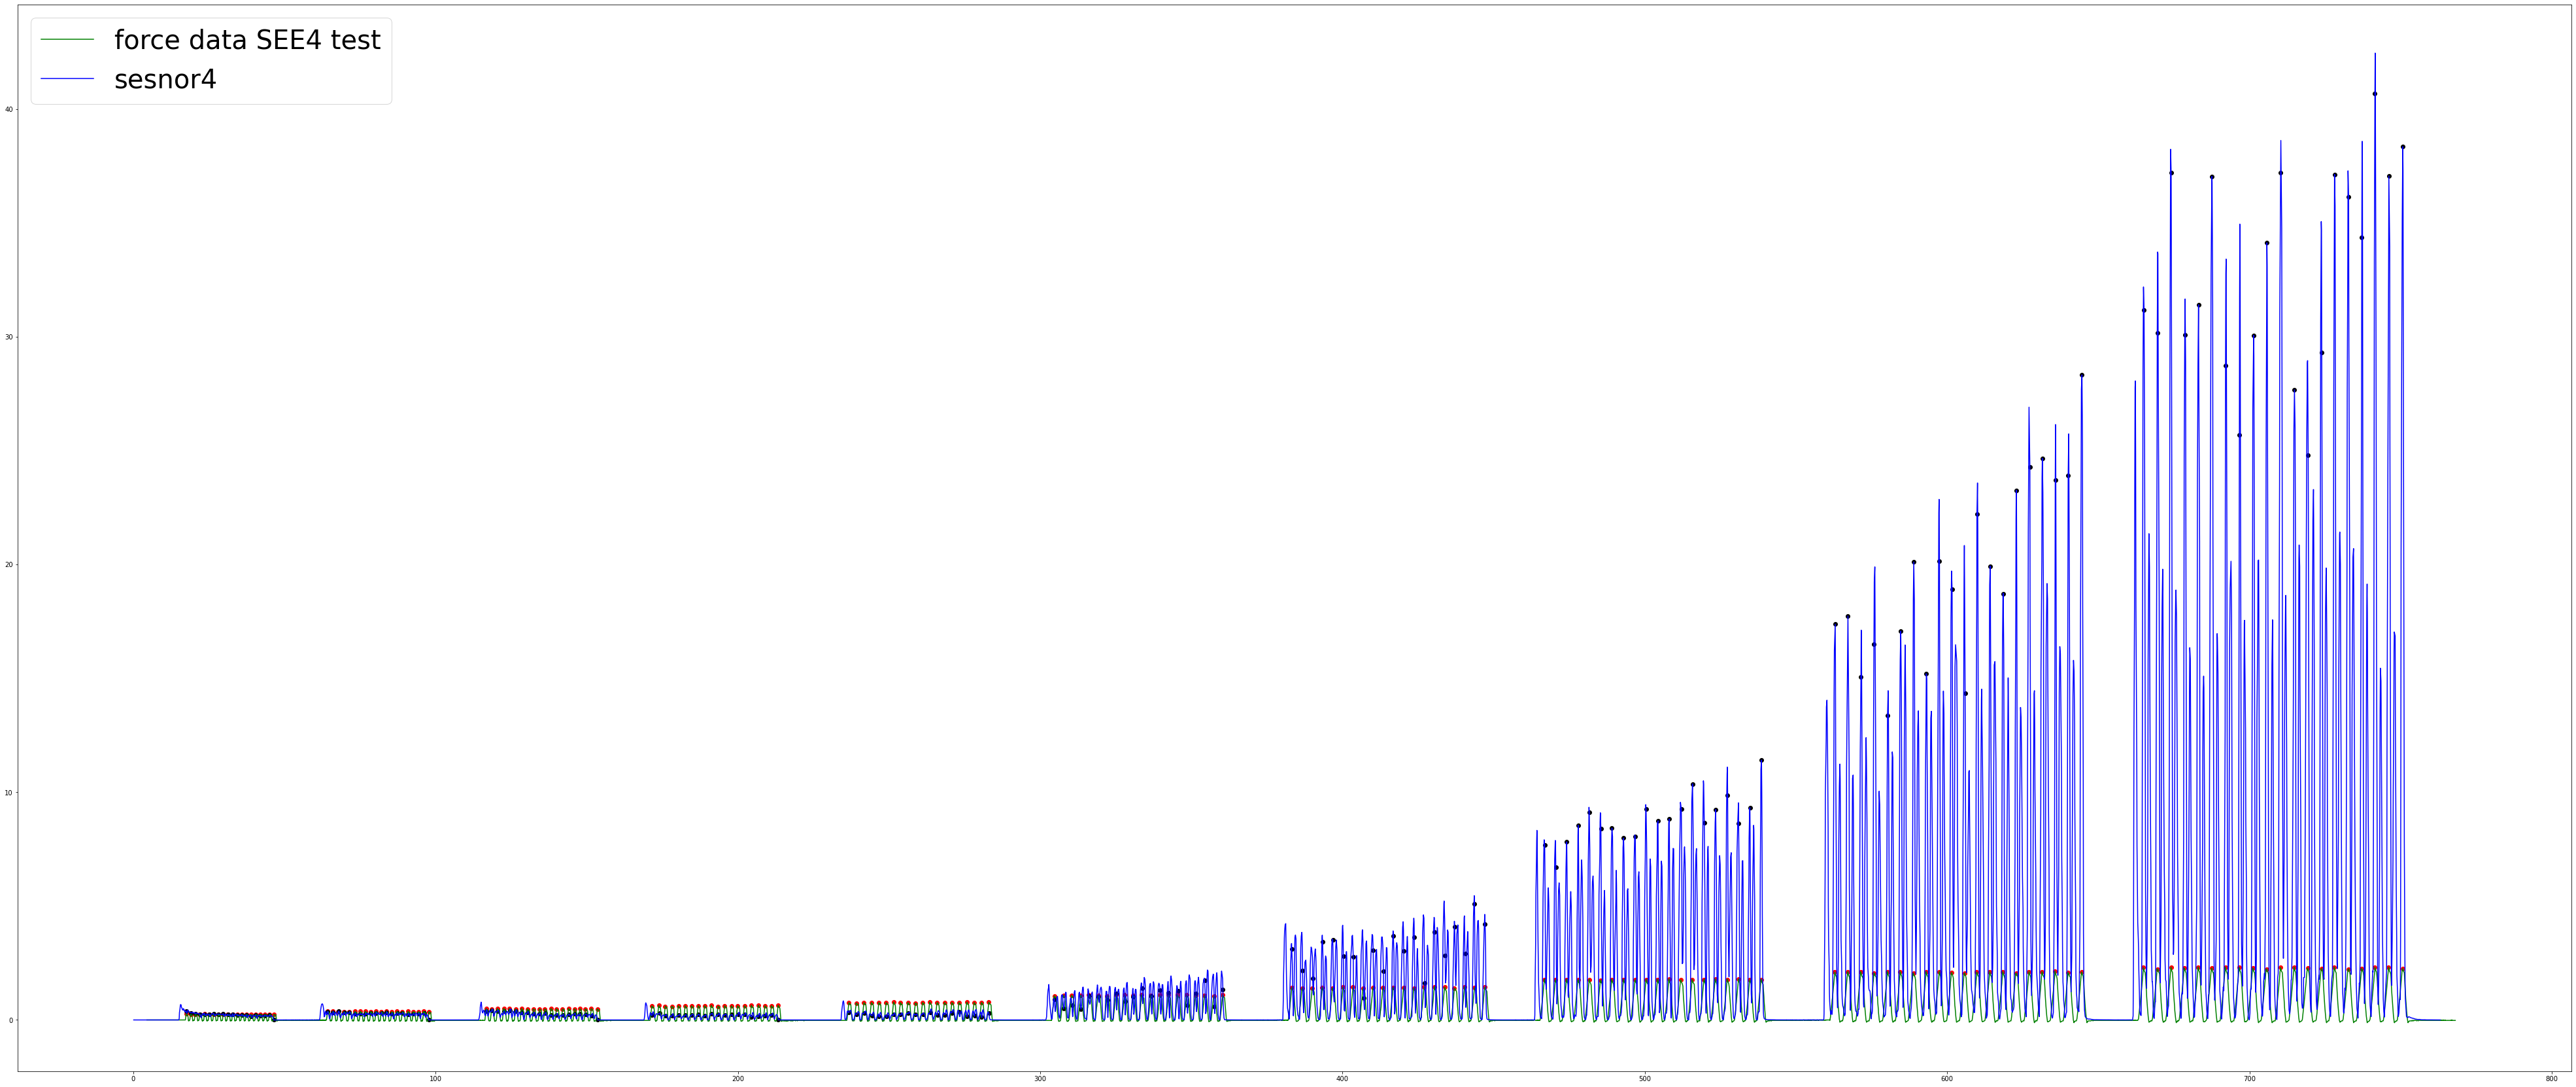

In [50]:
#visualizing and syncing the resistance data for each sensor S 1- 5 - SEE4

plt.figure(figsize=(70, 30))

# plt.plot(SEE4["Unnamed: 0"],SEE4["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(SEE4["Unnamed: 0"],SEE4["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SEE4["Unnamed: 0"],SEE4["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(SEE4["Unnamed: 0"],SEE4["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SEE4 = x_force_SEE4 + 4.5
scaled_SEE4 = SEE4["Unnamed: 0"]

plt.plot(scaled_x_force_SEE4,Load_SEE4,color = 'green', label = 'force data SEE4 test' )
plt.plot(scaled_SEE4,SEE4["s3_d"], color = 'blue', label = 'sesnor4')

plt.legend(fontsize=40)


print("Sensor 3 is more profound for SEE4")

#finding the peaks
pidx_Load_SEE4, _ = find_peaks(Load_SEE4,prominence= 0.1 )
peaks_Load_SEE4 = Load_SEE4[pidx_Load_SEE4]
peaks_Ltime_SEE4 = scaled_x_force_SEE4[pidx_Load_SEE4]

plt.scatter(peaks_Ltime_SEE4,peaks_Load_SEE4,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SEE4time = []
peaks_Ltime_SEE4.reset_index(drop = True, inplace = True)
peaks_Load_SEE4.reset_index(drop = True, inplace = True)
for i in range(len(peaks_Ltime_SEE4)):
    idx_SEE4time.append(bisect.bisect_left(SEE4["Unnamed: 0"], peaks_Ltime_SEE4[i]))

plt.scatter(SEE4["Unnamed: 0"][idx_SEE4time],SEE4["s3_d"][idx_SEE4time],color = 'black')

In [51]:
#Storing the data in csv files - SEE4
Load_SEE4peaks =[]
for i in range(len(peaks_Load_SEE4)):
    Load_SEE4peaks.append(peaks_Load_SEE4[i])
    
content_SEE4 = {'R1':SEE4["s1_d"][idx_SEE4time],
              'R2':SEE4["s2_d"][idx_SEE4time],
              'R3':SEE4["s3_d"][idx_SEE4time],
              'R4':SEE4["s4_d"][idx_SEE4time], 
              'Load': Load_SEE4peaks} 

# load_SE1 = {'Load': Load_SE1[pidx_Load_SE1]}

df_SEE4 = pd.DataFrame(content_SEE4, columns = ['R1','R2','R3','R4','Load'])

# load_SE1= pd.DataFrame(load_SE1, columns = ['Load'])
df_SEE4.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SEE4.csv',index = False, header = True)


Sensor 4 is more profound for SEE5


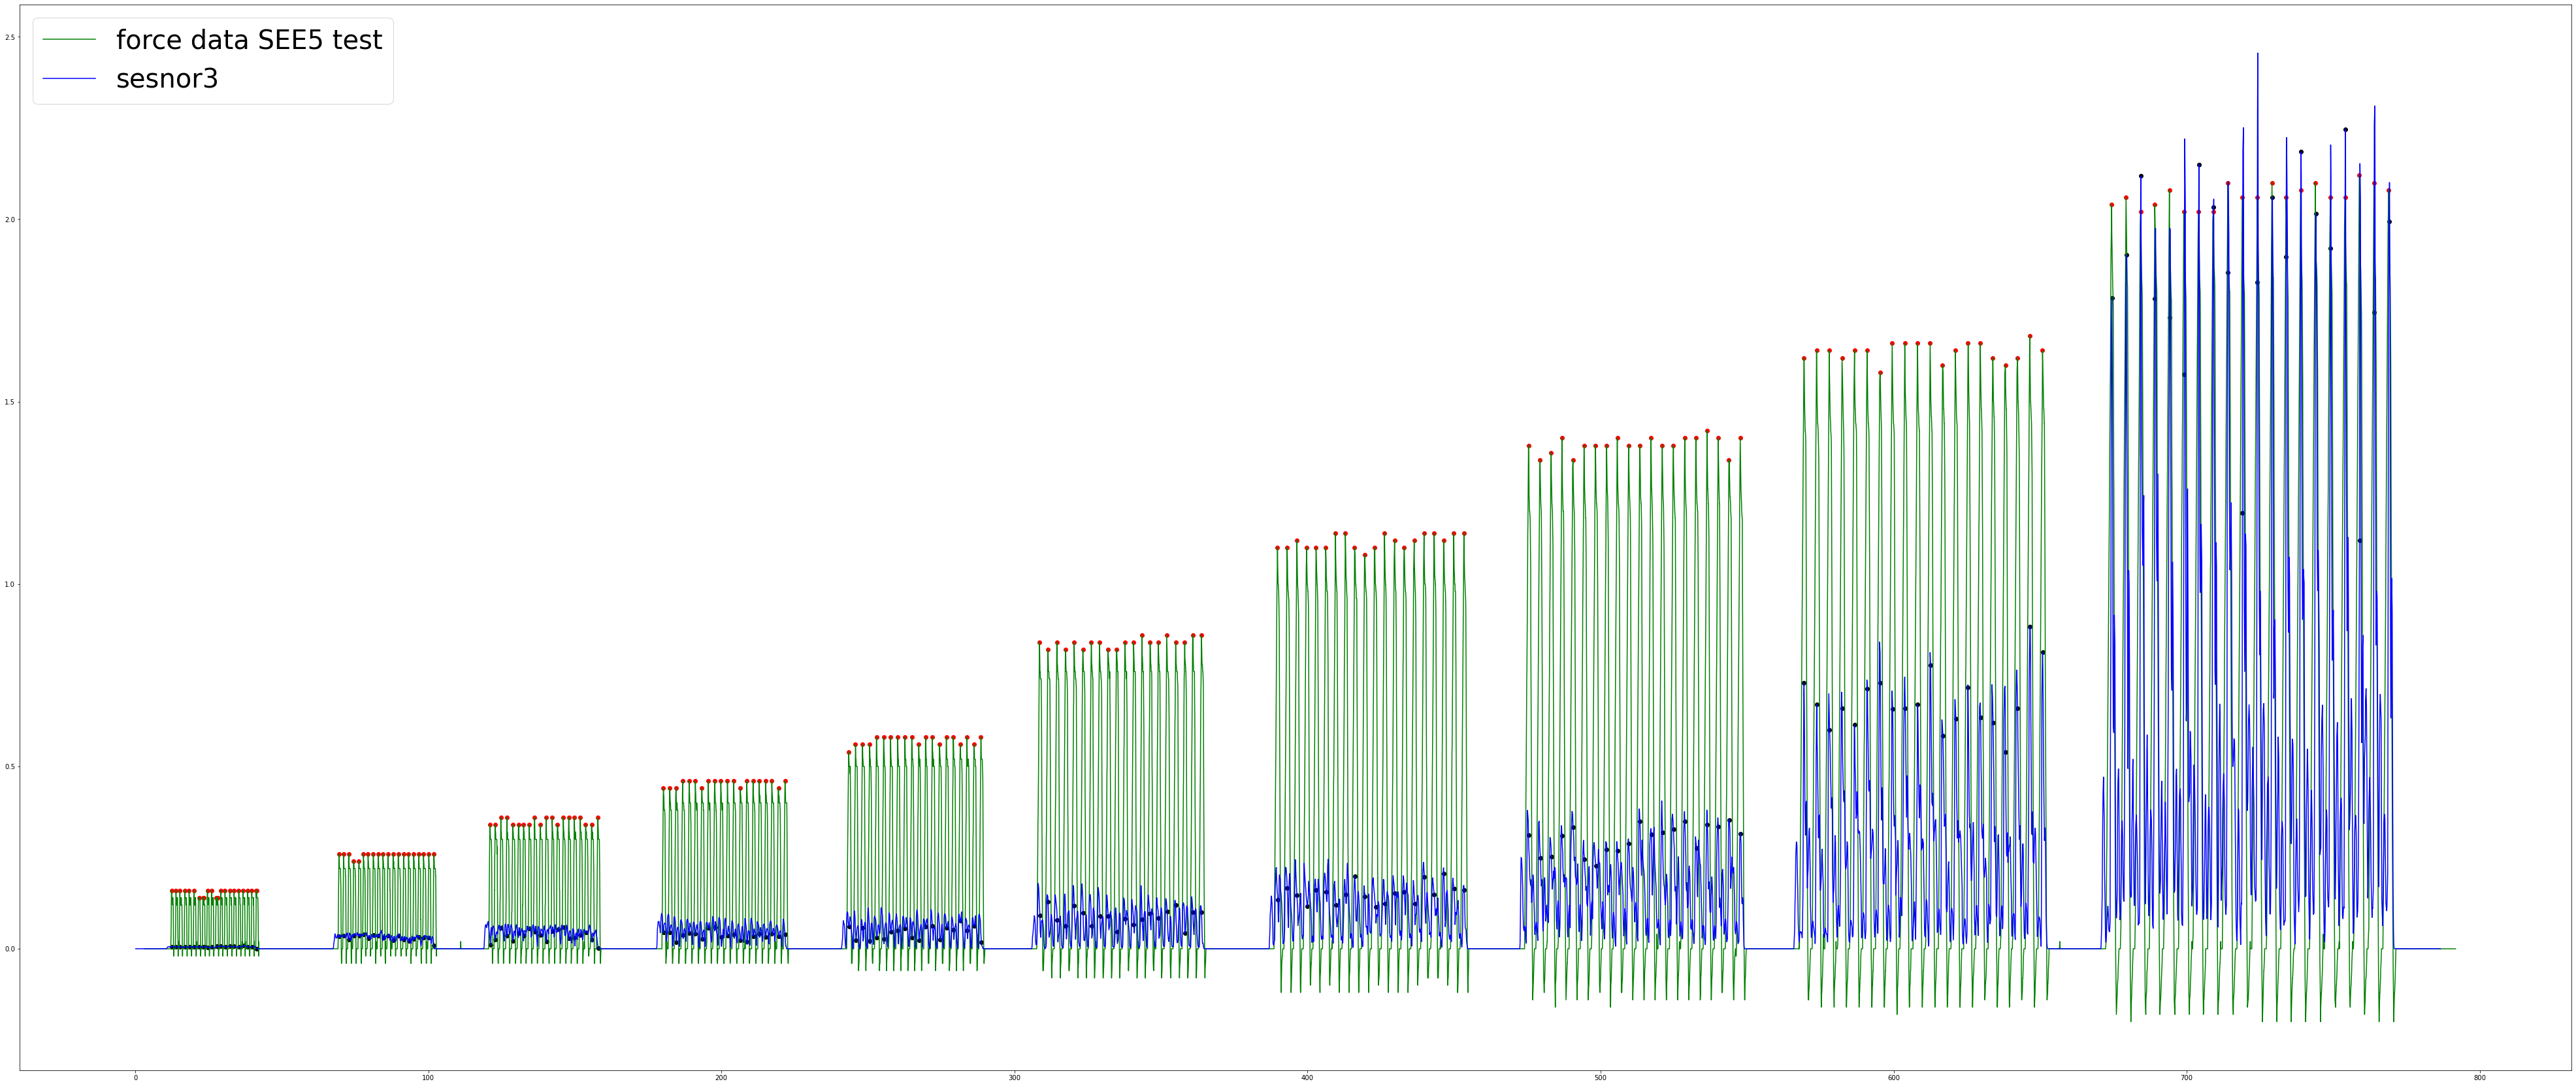

In [57]:
#visualizing and syncing the resistance data for each sensor S 1- 5 - SEE5

plt.figure(figsize=(70, 30))

# plt.plot(SEE5["Unnamed: 0"],SEE5["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(SEE5["Unnamed: 0"],SEE5["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SEE5["Unnamed: 0"],SEE5["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(SEE5["Unnamed: 0"],SEE5["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SEE5 = x_force_SEE5 + 3
scaled_SEE5 = SEE5["Unnamed: 0"]

plt.plot(scaled_x_force_SEE5,Load_SEE5,color = 'green', label = 'force data SEE5 test' )
plt.plot(scaled_SEE5,SEE5["s3_d"], color = 'blue', label = 'sesnor3')

plt.legend(fontsize=40)


print("Sensor 4 is more profound for SEE5")

#finding the peaks
pidx_Load_SEE5, _ = find_peaks(Load_SEE5,prominence= 0.1 )
peaks_Load_SEE5 = Load_SEE5[pidx_Load_SEE5]
peaks_Ltime_SEE5 = scaled_x_force_SEE5[pidx_Load_SEE5]

plt.scatter(peaks_Ltime_SEE5,peaks_Load_SEE5,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SEE5time = []
peaks_Ltime_SEE5.reset_index(drop = True, inplace = True)
peaks_Load_SEE5.reset_index(drop = True, inplace = True)
for i in range(len(peaks_Ltime_SEE5)):
    idx_SEE5time.append(bisect.bisect_left(SEE5["Unnamed: 0"], peaks_Ltime_SEE5[i]))

plt.scatter(SEE5["Unnamed: 0"][idx_SEE5time],SEE5["s3_d"][idx_SEE5time],color = 'black')

In [58]:
#Storing the data in csv files - SEE5
Load_SEE5peaks =[]
for i in range(len(peaks_Load_SEE5)):
    Load_SEE5peaks.append(peaks_Load_SEE5[i])
    
content_SEE5 = {'R1':SEE5["s1_d"][idx_SEE5time],
              'R2':SEE5["s2_d"][idx_SEE5time],
              'R3':SEE5["s3_d"][idx_SEE5time],
              'R4':SEE5["s4_d"][idx_SEE5time], 
              'Load': Load_SEE5peaks} 

# load_SE1 = {'Load': Load_SE1[pidx_Load_SE1]}

df_SEE5 = pd.DataFrame(content_SEE5, columns = ['R1','R2','R3','R4','Load'])

# load_SE1= pd.DataFrame(load_SE1, columns = ['Load'])
df_SEE5.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SEE5.csv',index = False, header = True)
